In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# We need to encode sex, smoker and region

from sklearn.preprocessing import OneHotEncoder

In [5]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [11]:
encoder = OneHotEncoder()

one_hot_encoded_data = encoder.fit_transform(categorical_cols)

encoded_feature_names = encoder.get_feature_names_out(categorical_cols.columns)

one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data.toarray(), columns=encoded_feature_names)

df = pd.concat([df, one_hot_encoded_df], axis=1)
df


,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [13]:
df = df.drop(['sex', 'smoker', 'region'], axis=1)
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
df.to_csv('insurance_cleaned.csv')

# Random Forest model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(columns='charges')
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 21141560.536624666


In [17]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error (MSE): {loss}")


Epoch 1/100


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 298279680.0000 - val_loss: 323366144.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 311802976.0000 - val_loss: 323244736.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 329280864.0000 - val_loss: 322963104.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 313108480.0000 - val_loss: 322388928.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 339148352.0000 - val_loss: 321374016.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 341058112.0000 - val_loss: 319737664.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 330699616.0000 - val_loss: 317367264.0000
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 329435680.0000 - val_loss: 313977888.0000
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 311767584.0000 - val_loss: 309761056.0000
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 313739520.0000 - val_loss: 

Such big Mean Squaer Error suggests that the model's predictions are, on average, somewhat far from the actual values, which is typical for insurance pricing prediction models, as they can be quite challenging due to the variability in charges.

One of the idea is to use Feature Engineering for example since insurance charges can be skewed, applying a log transformation to the target variable can sometimes improve performance

In [18]:
import numpy as np
y = np.log(df['charges'])

In [19]:
y_pred = np.exp(rf_model.predict(X_test))


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/var/folders/7q/tklnpyzn627dh58yxzs3qs140000gn/T/ipykernel_39254/1523829068.py:1: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(rf_model.predict(X_test))


In [24]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 19827788.64281029


Also we can try Hyperparameter Tuning with GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [23]:
grid_search.best_estimator_.score(X_test, y_test)  # r2

0.8700629018144743

R2 0.87 means that the model explains 87% of the variance in the test data, which is a strong result for a regression model, especially in a complex domain like insurance pricing.

In [28]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 142911341.29151383


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


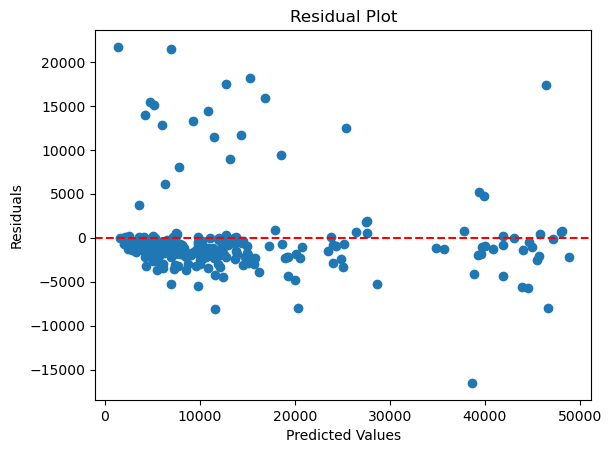

In [25]:
import matplotlib.pyplot as plt

y_pred = grid_search.best_estimator_.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [29]:
importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(feature_importance)

smoker_no           0.446822
smoker_yes          0.203651
bmi                 0.195619
age                 0.128981
children            0.013558
region_northeast    0.003707
region_northwest    0.002564
region_southeast    0.001546
region_southwest    0.001521
sex_female          0.001092
sex_male            0.000940
dtype: float64


Instead of relying on a single train/test split, we can use cross-validation to get a more reliable estimate of model performance.

In [21]:
from sklearn.model_selection import cross_val_score

mse_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -mse_scores.mean())


Cross-validated MSE: 0.16072120327181322


We can try Gradient Boosting or XGBoost. These ensemble methods often outperform Random Forests in structured data problems. XGBoost has built-in regularization which can improve performance:

In [22]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("MSE with XGBoost:", mean_squared_error(y_test, y_pred))


MSE with XGBoost: 19827788.64281029


Combining predictions from multiple models (e.g., Random Forest + XGBoost) to form an ensemble model. This can reduce variance and improve overall predictive power.

In [30]:
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(estimators=[
    ('rf', grid_search.best_estimator_),
    ('xgb', XGBRegressor(n_estimators=100))
])
voting_model.fit(X_train, y_train)
print("Ensemble R² score:", voting_model.score(X_test, y_test))


Ensemble R² score: 0.8690690806663958


Summary:
R² = 0.87 is a strong result, indicating that the model performs well.

Summary:
R² = 0.87 is a strong result, indicating that the model performs well.

This dataset, while valuable for basic exploratory modeling, lacks the depth and granularity required for highly accurate predictive models. It simplifies complex relationships that drive insurance costs, resulting in models that may struggle to fully capture the variability in charges. To improve model performance, more domain-specific features, better handling of non-linearity and outliers, and possibly additional data would be needed.